In [2]:
%pylab
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
def readfile(filename, n,d):
    y = np.zeros(n) # targets
    X = np.zeros((n,d)) # input matrix each row is a sample data point
    li = 0 
    with open(filename, "rb") as f:
        for line in f:
           if li>=n : 
             break;
           parts = line.split()
           y[li] = float(parts[0])
           for i in range(len(parts)): 
                if i >0 and parts[i] != '\n': 
                    fparts = parts[i].split(":")
                    X[li,int(fparts[0])-1] = float(fparts[1])
           li = li +1
    return (y,X)


Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [3]:
n = 32561; 
d = 123;
filename = "a9a"
y, X = readfile(filename,n,d)
#X = preprocessing.normalize(X, norm='l2')
lambd = 1.0/n
U, s, V = np.linalg.svd(X, full_matrices=False) # s is lambda matrix in the write-up and  U and V are changed here
s2 = np.power(s,2)
s = s/float(n)
s2 = s2/float(n)
s2l = s2 + lambd
d = np.divide(s,s2l)
w = np.dot(np.transpose(V),np.dot(np.diag(d),np.dot(np.transpose(U),y)))

In [4]:
np.linalg.norm(w)

1.4062865653923524

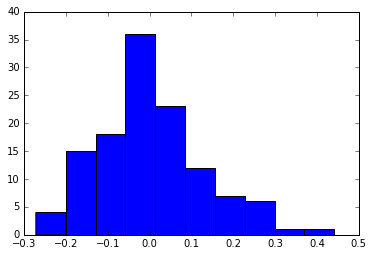

In [5]:
p = np.dot(np.diag(d),np.dot(np.transpose(U),y))
plt.hist(p)
plt.savefig('dots_times_eigns.eps', facecolor='w', edgecolor='w', orientation='portrait',  format='eps')

In [6]:
U.shape

(32561, 123)

In [7]:
V.shape

(123, 123)

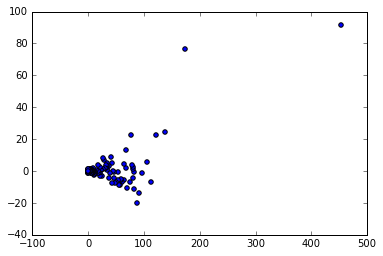

In [8]:
tem = np.dot(np.transpose(U),y)
plt.scatter(s*n,tem)
plt.savefig('dot_vs_eign_2.eps', facecolor='w', edgecolor='w', orientation='portrait',  format='eps')